# Week 10 Lab (K Means)
## COSC 3337 Dr. Rizk

## About The Data
We'll be using the Customer Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:
- CustomerID
- Genre
- Age
- AnnualIncome(k$)
- Spending_Score

Our goal is to group/cluster these customers.

## About K Means
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
1. Reassign data points to the cluster whose centroid is closest.
2. Calculate new centroid of each cluster.

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids. Refer back to the lecture video or slides for more detail on K Means.

## Implementation
Because K Means is used more for finding patterns in our data, we'll skip the data exploration portion, but you're welcome to explore this data or your own if working with a different dataset.

Let's first load the data into a pandas DataFrame. We'll use the CustomerID column as our index_col for this DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
from sklearn import datasets

In [2]:
customer_df = pd.read_csv('customers.csv', index_col='CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Different examples

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


calling .info() we see that there are no missing values in this dataset since there are 200 entries in total and 200 non-null entries in each column.

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Different example

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Different examples

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To ensure that we don't have any duplicates, we can call .drop_duplicates(inplace=True) on our DataFrame.

Just so that we can visualize our clusters in the end of this lab, we'll go ahead and only work with 2 variables (spending score and income). However, you're free to use more than 2 variables if you're working with your own dataset.

In [8]:
customer_df.drop_duplicates(inplace=True)

In [9]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

### Different examples

In [10]:
iris_df.drop_duplicates(inplace= True)
x2 = iris_df.iloc[:, [0, 1, 2, 3]].values

We'll now use the elbow method to find the optimal number of clusters.

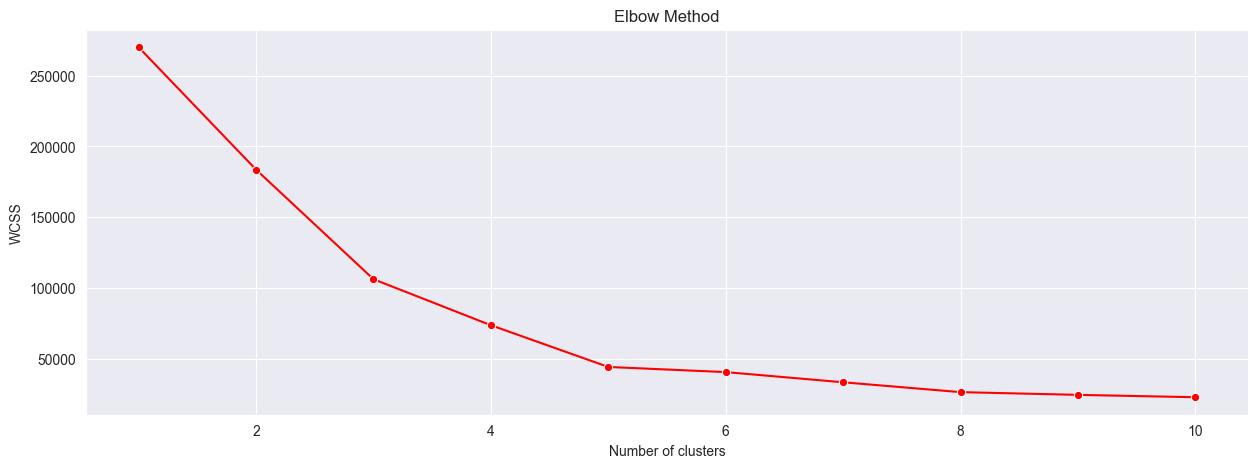

In [11]:
from sklearn.cluster import KMeans
# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)
# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Different examples

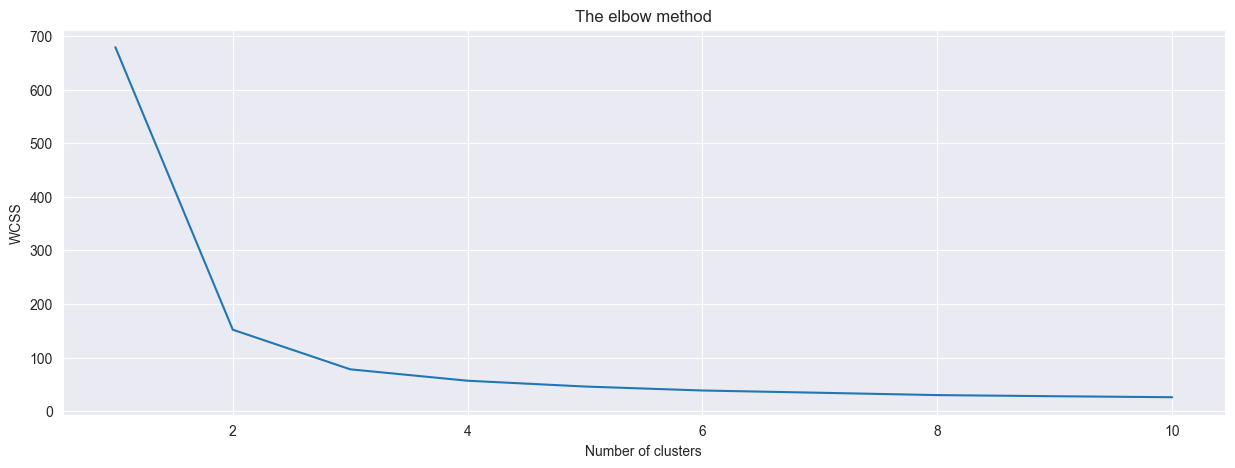

In [12]:
wcss2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans2.fit(x2)
    wcss2.append(kmeans2.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss2)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We're now ready to create our KMeans model and run our predictions on the X vector we created earlier with spending score and
income.


In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++' , random_state = 42)
y_pred = kmeans.fit_predict(X)

### Different examples

In [14]:
kmeans2 = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(x2)

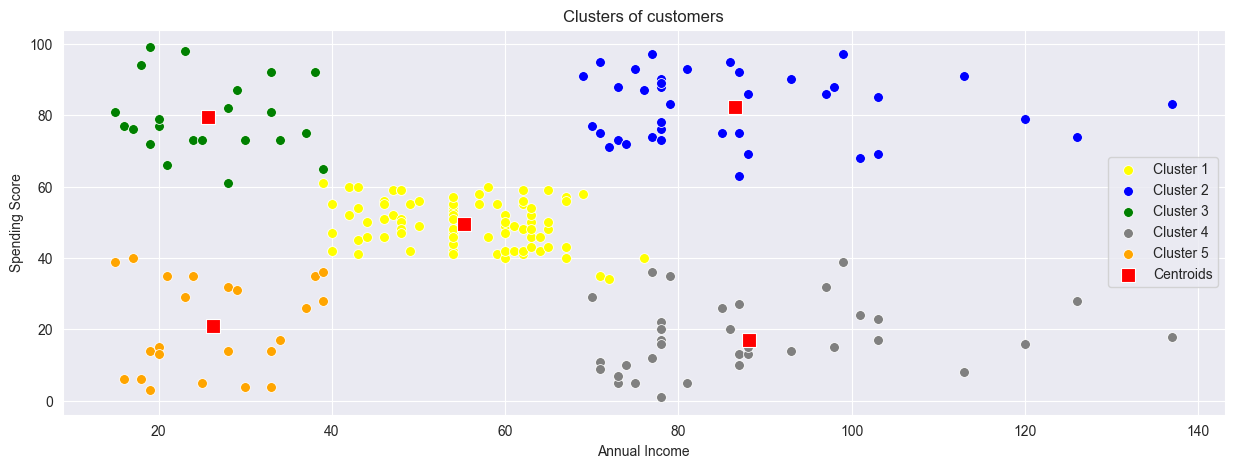

In [15]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Different examples

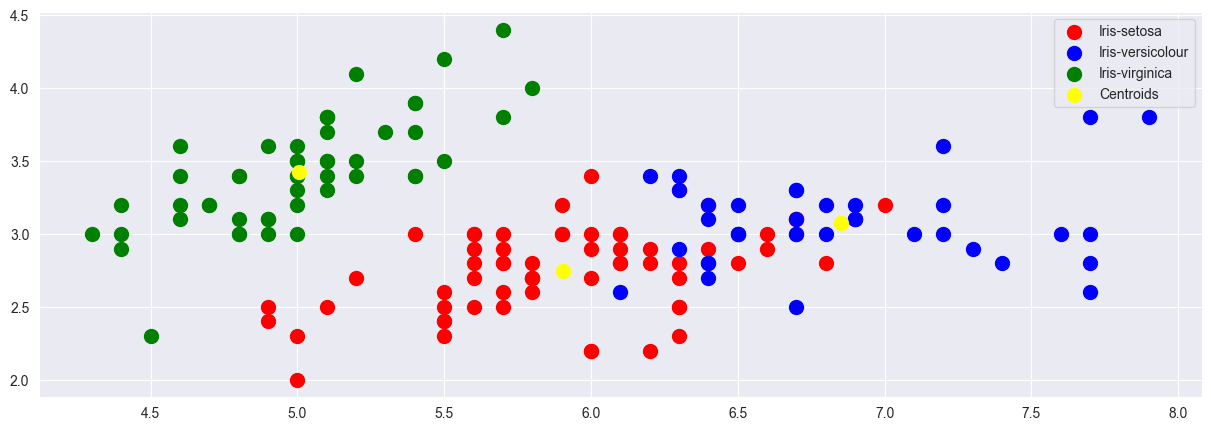

In [16]:
plt.scatter(x2[y_kmeans2 == 0, 0], x2[y_kmeans2 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x2[y_kmeans2 == 1, 0], x2[y_kmeans2 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x2[y_kmeans2 == 2, 0], x2[y_kmeans2 == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()